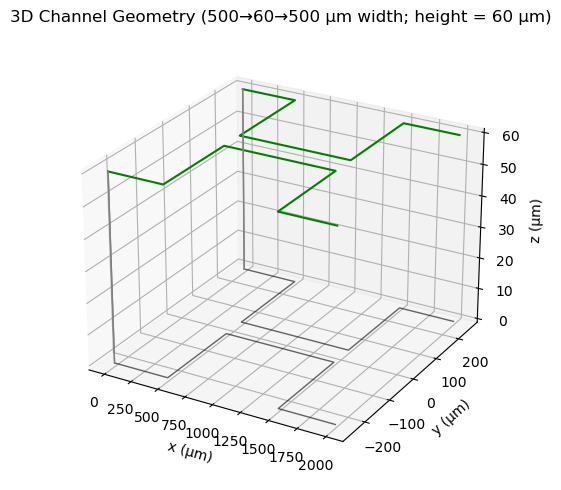

In [2]:
## 3D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # adds 3D plotting support

# --- Geometry (µm) ---
PRE_LEN = 500.0          # straight inlet length
STEN_LEN = 1000.0        # stenosis length
POST_LEN = 500.0         # straight outlet length
W_MAIN   = 500.0         # main channel width
W_STEN   = 60.0          # stenosis width
H        = 60.0          # channel height (z-direction)

TOTAL_LEN = PRE_LEN + STEN_LEN + POST_LEN
X1 = PRE_LEN
X2 = PRE_LEN + STEN_LEN

def generate_rect_profile(num_points=2000):
    """Generate the 2D outline profile in µm."""
    x = np.linspace(0.0, TOTAL_LEN, num_points)
    top_half = np.where(
        x < X1,           +W_MAIN/2,
        np.where(x <= X2, +W_STEN/2, +W_MAIN/2)
    )
    bottom_half = -top_half
    return x, top_half, bottom_half

def plot_rect_profile_3D():
    """Plot the rectangular stenosis as a 3D channel (extruded to 60 µm)."""
    x, top_y, bottom_y = generate_rect_profile()
    z_top = np.ones_like(x) * H       # top surface (z = 60 µm)
    z_bottom = np.zeros_like(x)       # bottom surface (z = 0 µm)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, projection='3d')

    # Front wall (top_y at z=0→H)
    ax.plot(x, top_y, z_top, color='green', linewidth=1.5, label='Top wall')
    ax.plot(x, bottom_y, z_top, color='green', linewidth=1.5)
    ax.plot(x, top_y, z_bottom, color='black', linewidth=1.0, alpha=0.6)
    ax.plot(x, bottom_y, z_bottom, color='black', linewidth=1.0, alpha=0.6)

    # Connect edges in z-direction
    for side_y in [top_y[0], bottom_y[0], top_y[-1], bottom_y[-1]]:
        ax.plot([x[0], x[0]], [side_y, side_y], [0, H], color='gray', linewidth=1)

    ax.set_xlabel('x (µm)')
    ax.set_ylabel('y (µm)')
    ax.set_zlabel('z (µm)')
    ax.set_title('3D Channel Geometry (500→60→500 µm width; height = 60 µm)')
    ax.view_init(elev=25, azim=-60)  # better angle
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_rect_profile_3D()


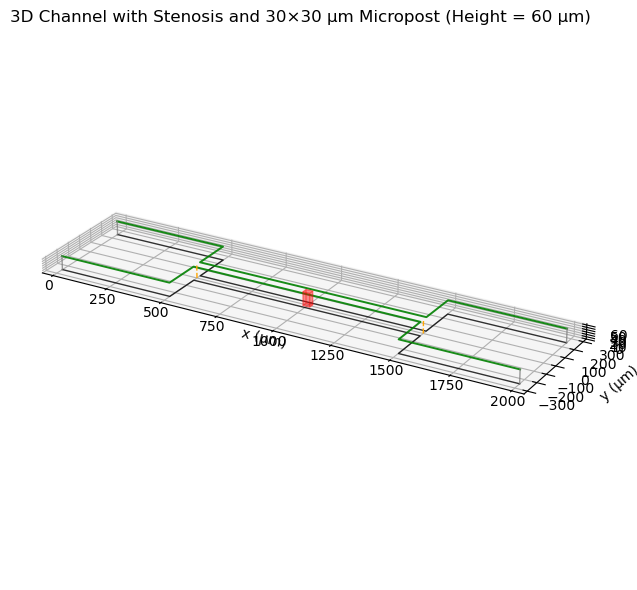

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# --- Geometry (µm) ---
PRE_LEN = 500.0          # straight inlet length
STEN_LEN = 1000.0        # stenosis length
POST_LEN = 500.0         # straight outlet length
W_MAIN   = 500.0         # main channel width
W_STEN   = 60.0          # stenosis width
H        = 60.0          # channel height (z)
POST_S   = 30.0          # micropost square side

TOTAL_LEN = PRE_LEN + STEN_LEN + POST_LEN
X1 = PRE_LEN
X2 = PRE_LEN + STEN_LEN
POST_CX = PRE_LEN + STEN_LEN/2.0   # micropost center x
POST_CY = 0.0                      # micropost center y

def generate_rect_profile(num_points=2000):
    """Return x, top_y, bottom_y (all in µm) for the channel plan-view."""
    x = np.linspace(0.0, TOTAL_LEN, num_points)
    top_y = np.where(x < X1, +W_MAIN/2,
                     np.where(x <= X2, +W_STEN/2, +W_MAIN/2))
    bottom_y = -top_y
    return x, top_y, bottom_y

def prism_faces(x0, x1, y0, y1, z0, z1):
    """Axis-aligned rectangular prism faces for Poly3DCollection."""
    # eight vertices
    v000 = (x0, y0, z0); v001 = (x0, y0, z1)
    v010 = (x0, y1, z0); v011 = (x0, y1, z1)
    v100 = (x1, y0, z0); v101 = (x1, y0, z1)
    v110 = (x1, y1, z0); v111 = (x1, y1, z1)
    # 6 faces
    return [
        [v000, v100, v110, v010],  # bottom (z=z0)
        [v001, v011, v111, v101],  # top    (z=z1)
        [v000, v010, v011, v001],  # left   (x=x0)
        [v100, v101, v111, v110],  # right  (x=x1)
        [v000, v001, v101, v100],  # front  (y=y0)
        [v010, v110, v111, v011],  # back   (y=y1)
    ]

def plot_rect_profile_3D_with_post():
    x, top_y, bottom_y = generate_rect_profile()
    z0 = np.zeros_like(x)
    z1 = np.ones_like(x) * H

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Channel "wireframe" (plan-view curves extruded to z=0 and z=H)
    ax.plot(x, top_y, z0, color='black', linewidth=1.0, alpha=0.8)
    ax.plot(x, bottom_y, z0, color='black', linewidth=1.0, alpha=0.8)
    ax.plot(x, top_y, z1, color='green', linewidth=1.4, alpha=0.9)
    ax.plot(x, bottom_y, z1, color='green', linewidth=1.4, alpha=0.9)

    # Connect inlet/outlet edges in z
    for X in [0.0, TOTAL_LEN]:
        # find nearest index
        i = np.argmin(np.abs(x - X))
        ax.plot([x[i], x[i]], [top_y[i], top_y[i]], [0, H], color='gray', linewidth=1.0, alpha=0.8)
        ax.plot([x[i], x[i]], [bottom_y[i], bottom_y[i]], [0, H], color='gray', linewidth=1.0, alpha=0.8)

    # --- Micropost (30 µm × 30 µm × 60 µm), centered in stenosis ---
    half = POST_S / 2.0
    px0 = POST_CX - half; px1 = POST_CX + half
    py0 = POST_CY - half; py1 = POST_CY + half
    pz0 = 0.0;           pz1 = H

    post = Poly3DCollection(
        prism_faces(px0, px1, py0, py1, pz0, pz1),
        alpha=0.25, linewidths=0.8
    )
    post.set_edgecolor('red')
    post.set_facecolor('red')
    ax.add_collection3d(post)

    # Visual guides for stenosis region
    ax.plot([X1, X1], [0, 0], [0, H], linestyle='--', color='orange', linewidth=1.0)
    ax.plot([X2, X2], [0, 0], [0, H], linestyle='--', color='orange', linewidth=1.0)

    ax.set_xlabel('x (µm)')
    ax.set_ylabel('y (µm)')
    ax.set_zlabel('z (µm)')
    ax.set_title('3D Channel with Stenosis and 30×30 µm Micropost (Height = 60 µm)')
    ax.view_init(elev=25, azim=-60)
    ax.set_box_aspect((TOTAL_LEN, W_MAIN, H))  # keep proportions sensible

    # nice margins
    ax.set_xlim(-50, TOTAL_LEN + 50)
    ax.set_ylim(-W_MAIN/1.5, W_MAIN/1.5)
    ax.set_zlim(0, H + 5)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_rect_profile_3D_with_post()


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for numpy-stl from https://files.pythonhosted.org/packages/ea/2c/e17b8814050427929077639d35a42187a006922600d4840475bdc5f64ebb/numpy_stl-3.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for python-utils>=3.4.5 from https://files.pythonhosted.org/packages/d4/69/31c82567719b34d8f6b41077732589104883771d182a9f4ff3e71430999a/python_utils-3.9.1-py2.py3-none-any.whl.metadata


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


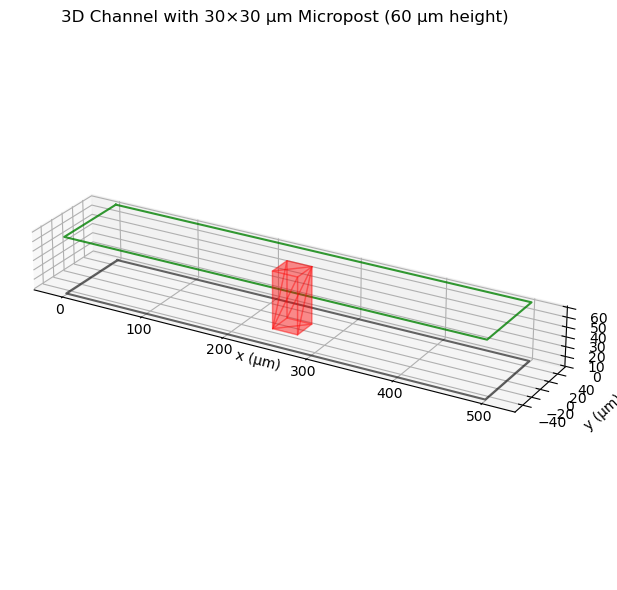

 STL exported: stenosis_with_post.stl


In [4]:
# First, install the numpy-stl package
!pip install numpy-stl

# Then import the necessary modules
import numpy as np
from stl import mesh  # This will now work after installing numpy-stl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define your constants (which were missing from the original snippet)
TOTAL_LEN = 500  # Example value
W_MAIN = 100     # Example value
H = 60           # Example value
POST_CX = 250    # Example value
POST_CY = 0      # Example value
POST_S = 30      # Example value

# Define the prism_faces function that was missing
def prism_faces(x0, x1, y0, y1, z0, z1):
    """Create triangular faces for a rectangular prism."""
    # Define the 8 vertices of the prism
    v000 = [x0, y0, z0]
    v001 = [x0, y0, z1]
    v010 = [x0, y1, z0]
    v011 = [x0, y1, z1]
    v100 = [x1, y0, z0]
    v101 = [x1, y0, z1]
    v110 = [x1, y1, z0]
    v111 = [x1, y1, z1]
    
    # Create triangular faces (each rectangular face is split into 2 triangles)
    faces = [
        # Bottom face (z=z0)
        [v000, v100, v110],
        [v000, v110, v010],
        # Top face (z=z1)
        [v001, v011, v111],
        [v001, v111, v101],
        # Front face (y=y0)
        [v000, v001, v101],
        [v000, v101, v100],
        # Back face (y=y1)
        [v010, v110, v111],
        [v010, v111, v011],
        # Left face (x=x0)
        [v000, v010, v011],
        [v000, v011, v001],
        # Right face (x=x1)
        [v100, v101, v111],
        [v100, v111, v110]
    ]
    
    return faces

def export_stl(filename, TOTAL_LEN, W_MAIN, H, POST_S, POST_CX, POST_CY):
    """Export the channel and micropost as an STL mesh."""
    # Channel block (approximation of overall outer shape)
    channel_faces = prism_faces(0, TOTAL_LEN, -W_MAIN/2, W_MAIN/2, 0, H)
    # Micropost block
    half = POST_S / 2
    px0, px1 = POST_CX - half, POST_CX + half
    py0, py1 = POST_CY - half, POST_CY + half
    post_faces = prism_faces(px0, px1, py0, py1, 0, H)
    all_faces = np.array(channel_faces + post_faces)

    # Create the STL mesh
    channel_mesh = mesh.Mesh(np.zeros(all_faces.shape[0], dtype=mesh.Mesh.dtype))
    for i, f in enumerate(all_faces):
        channel_mesh.vectors[i] = np.array(f)

    channel_mesh.save(filename)
    print(f" STL exported: {filename}")

def plot_rect_profile_3D_with_post():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Channel outer shape wireframe
    ax.plot([0, TOTAL_LEN, TOTAL_LEN, 0, 0],
            [W_MAIN/2, W_MAIN/2, -W_MAIN/2, -W_MAIN/2, W_MAIN/2],
            [0, 0, 0, 0, 0], color='black', alpha=0.6)
    ax.plot([0, TOTAL_LEN, TOTAL_LEN, 0, 0],
            [W_MAIN/2, W_MAIN/2, -W_MAIN/2, -W_MAIN/2, W_MAIN/2],
            [H, H, H, H, H], color='green', alpha=0.8)

    # Micropost block
    half = POST_S / 2
    px0, px1 = POST_CX - half, POST_CX + half
    py0, py1 = POST_CY - half, POST_CY + half
    post = Poly3DCollection(prism_faces(px0, px1, py0, py1, 0, H), alpha=0.25)
    post.set_edgecolor('red'); post.set_facecolor('red')
    ax.add_collection3d(post)

    ax.set_xlabel('x (µm)'); ax.set_ylabel('y (µm)'); ax.set_zlabel('z (µm)')
    ax.set_title('3D Channel with 30×30 µm Micropost (60 µm height)')
    ax.view_init(elev=25, azim=-60)
    ax.set_box_aspect((TOTAL_LEN, W_MAIN, H))
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_rect_profile_3D_with_post()
    export_stl("stenosis_with_post.stl", TOTAL_LEN, W_MAIN, H, POST_S, POST_CX, POST_CY)